<a href="https://colab.research.google.com/github/ladkrutarth/PDS_-FInal_Project/blob/main/PDS_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


## Import DataSet

In [6]:
# Mount Google Drive and load data
from google.colab import drive
#drive.mount('/content/drive')

#file_path = "/content/drive/MyDrive/Colab files/diabetic_data.csv"
file_path = '/content/diabetic_data.csv'
raw_df = pd.read_csv(file_path)



In [7]:
# quick preview of what the data looks like
raw_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Exploratory data analysis (EDA)

1.   Data Cleaning
2.   Data Wrangling
3.   Data Visulazation



In [ ]:
raw

In [ ]:
# count number of missing values
raw_df.isna().sum()

,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
weight,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [ ]:
# columns in raw-df that has ? as values and their percentages

question_mark_percentages = (raw_df.isin(['?']).sum() / len(raw_df)) * 100

# Filter columns with '?' values and their percentages
columns_with_question_marks = question_mark_percentages[question_mark_percentages > 0]

columns_with_question_marks


,0
race,2.233555
weight,96.858479
payer_code,39.557416
medical_specialty,49.082208
diag_1,0.020636
diag_2,0.351787
diag_3,1.398306


In [ ]:
# handling columns with missing values and ?
cleaned_raw_df = raw_df.copy()
cleaned_raw_df = cleaned_raw_df.drop(['weight', 'max_glu_serum','A1Cresult'], axis=1)
cleaned_raw_df.head()


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
 # removing other columns which are not important for the analysis such as payer_code, encounter_id and patient_nbr

cleaned_raw_df = cleaned_raw_df.drop(['encounter_id','payer_code', 'patient_nbr'], axis=1)
cleaned_raw_df.head()


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,?,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,?,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,?,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,?,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


medical specialty and race can be risk factors for hospital readmission so they are not dropped or imputed for now although they contain ?. Instead ? is replaced with unknown specialty  and unknown respectively.


In [ ]:
# Replace '?' in medical_specialty with 'Unknown_Specialty'
cleaned_raw_df['medical_specialty'] = cleaned_raw_df['medical_specialty'].replace('?', 'Unknown_Specialty')

# Replace '?' in race with 'Unknown'
cleaned_raw_df['race'] = cleaned_raw_df['race'].replace('?', 'Unknown')

print("Unique values in 'medical_specialty':")
print(cleaned_raw_df['medical_specialty'].unique())

print("\nUnique values in 'race':")
print(cleaned_raw_df['race'].unique())


Unique values in 'medical_specialty':
['Pediatrics-Endocrinology' 'Unknown_Specialty' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psychiatry-Child/Adolescent'
 'Pediatrics-Pulmonology' 'Neurology' 'Anesthesiology-Pediatric'
 'Radiology' 'Pediatrics-Hematology-Oncology' 'Psychology' 'Podiatry'
 'Gynecology' 'Oncology' 'Pediatrics-Neurology' 'Surgery-Plastic'
 'Surgery-Thoracic' 'Surgery-PlasticwithinHeadandNeck' 'Ophthalmology'
 'Surgery-Pediatric' 'Pediatrics-EmergencyMedicine'
 'PhysicalMedicineandRehabilitation' 'InfectiousDiseases' 'Anesthesiology'
 'Rheumatology' 'AllergyandImmunology' '

In [ ]:
# total number of missing values
cleaned_raw_df.isna().sum().sum()

np.int64(0)

In [ ]:
# target variable
cleaned_raw_df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [ ]:
# create a new binary target variable
cleaned_raw_df['readmit_30'] = cleaned_raw_df['readmitted'].map({
    '<30': 1,
    '>30': 0,
    'NO': 0
})
print(cleaned_raw_df['readmit_30'].unique())

[0 1]


Interested in patient readmission within 30 days represented by 1 and any other thing (no readmission and more than 30 days readmission) is also represented by 0

In [ ]:
# check distribution of readmissions within 30 days
# Calculate counts manually
count_0 = (cleaned_raw_df['readmit_30'] == 0).sum()
count_1 = (cleaned_raw_df['readmit_30'] == 1).sum()

# Build interactive figure
fig = go.Figure(data=[
    go.Bar(
        x=["Not Readmitted (0)", "Readmitted (1)"],
        y=[count_0, count_1],
        text=[count_0, count_1],
        textposition='auto',
        marker=dict(color=['royalblue', 'tomato']),
        hoverinfo='x+y'
    )
])

fig.update_layout(
    title="Distribution of Patient Readmissions Within 30 Day",
    xaxis_title="Readmission Status",
    yaxis_title="Count",
    hovermode="closest",
    width=600,
    height=600
)

fig.show()


In [ ]:
# distribution of race for readmission within 30 days

# 1. Filter only patients who were readmitted within 30 days
readmitted_df = cleaned_raw_df[cleaned_raw_df['readmit_30'] == 1]

# 2. Group filtered data: count patients by race
race_readmit_counts = readmitted_df['race'].value_counts().reset_index()
race_readmit_counts.columns = ['race', 'count']

# 3. Build interactive bar plot
fig = px.bar(
    race_readmit_counts,
    x='race',
    y='count',
    text='count',
    labels={'race': 'Race', 'count': 'Number of Readmitted Patients'},
    title='Readmitted Patients (within 30 Days) by Race'
)

fig.update_traces(textposition='auto')
fig.update_layout(
    width=800,
    height=500,
    hovermode='closest'
)

fig.show()


In [ ]:
# readmission vs age

# Group filtered data: count patients by age group
age_readmit_counts = readmitted_df['age'].value_counts().sort_index().reset_index()
age_readmit_counts.columns = ['age', 'count']

# Build interactive bar plot
fig = px.bar(
    age_readmit_counts,
    x='age',
    y='count',
    text='count',
    labels={'age': 'Age Group', 'count': 'Number of Readmitted Patients'},
    title='Readmitted Patients (within 30 Days) by Age'
)

fig.update_traces(textposition='auto')
fig.update_layout(
    width=800,
    height=500,
    hovermode='closest'
)

fig.show()


In [ ]:
# readmission vs number of inpatient visits
# Group filtered data: count by number_inpatient
inpatient_readmit_counts = readmitted_df['number_inpatient'].value_counts().sort_index().reset_index()
inpatient_readmit_counts.columns = ['number_inpatient', 'count']

# Build interactive bar plot
fig = px.bar(
    inpatient_readmit_counts,
    x='number_inpatient',
    y='count',
    text='count',
    labels={'number_inpatient': 'Number of Prior Inpatient Visits', 'count': 'Number of Readmitted Patients'},
    title='Readmitted Patients (within 30 Days) by Number of Prior Inpatient Visits'
)

fig.update_traces(textposition='auto')
fig.update_layout(
    width=800,
    height=500,
    hovermode='closest'
)

fig.show()

In [ ]:
# readmission vs number of diagnosis
diagnoses_readmit_counts = readmitted_df['number_diagnoses'].value_counts().sort_index().reset_index()
diagnoses_readmit_counts.columns = ['number_diagnoses', 'count']

# 3. Build interactive bar plot
fig = px.bar(
    diagnoses_readmit_counts,
    x='number_diagnoses',
    y='count',
    text='count',
    labels={'number_diagnoses': 'Number of Diagnoses', 'count': 'Number of Readmitted Patients'},
    title='Readmitted Patients (within 30 Days) by Number of Diagnoses '
)

fig.update_traces(textposition='auto')
fig.update_layout(
    width=800,
    height=500,
    hovermode='closest'
)

fig.show()

In [ ]:
# readmission vs medical specialty
specialty_readmit_counts = readmitted_df['medical_specialty'].value_counts().reset_index()
specialty_readmit_counts.columns = ['medical_specialty', 'count']

# 3. Build interactive bar plot
fig = px.bar(
    specialty_readmit_counts,
    x='medical_specialty',
    y='count',
    text='count',
    labels={'medical_specialty': 'Medical Specialty', 'count': 'Number of Readmitted Patients'},
    title='Readmitted Patients (within 30 Days) by Medical Specialty'
)

fig.update_traces(textposition='auto')
fig.update_layout(
    width=1000,
    height=600,
    xaxis={'categoryorder':'total descending'},  # Sort bars descending
    hovermode='closest'
)

fig.show()

In [ ]:
# converting categorical columns into numerical form using LabelEncoder.

# Make a copy of the original cleaned DataFrame
encoded_cleaned_raw_df = cleaned_raw_df.copy()

# Exclude 'readmitted column' from encoding since a binary column has already been created
columns_to_encode = encoded_cleaned_raw_df.select_dtypes(include=['object']).columns
columns_to_encode = [col for col in columns_to_encode if col != 'readmitted']

# Apply label encoding to all other object (string) columns
label_encoder = LabelEncoder()
for col in columns_to_encode:
    encoded_cleaned_raw_df[col] = label_encoder.fit_transform(encoded_cleaned_raw_df[col].astype(str))

# Drop the original 'readmitted' column to avoid confusion
encoded_cleaned_raw_df.drop(columns=['readmitted'], inplace=True)

# show info
print(encoded_cleaned_raw_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 44 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   race                      101766 non-null  int64
 1   gender                    101766 non-null  int64
 2   age                       101766 non-null  int64
 3   admission_type_id         101766 non-null  int64
 4   discharge_disposition_id  101766 non-null  int64
 5   admission_source_id       101766 non-null  int64
 6   time_in_hospital          101766 non-null  int64
 7   medical_specialty         101766 non-null  int64
 8   num_lab_procedures        101766 non-null  int64
 9   num_procedures            101766 non-null  int64
 10  num_medications           101766 non-null  int64
 11  number_outpatient         101766 non-null  int64
 12  number_emergency          101766 non-null  int64
 13  number_inpatient          101766 non-null  int64
 14  diag_1              

In [ ]:
# feature selection for heatmap - core demographic, clinical, and hospitalization variables related to patient status.
selected_columns = [
    'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses', 'race', 'age', 'gender',
    'change', 'diabetesMed', 'insulin', 'medical_specialty', 'readmit_30'
]

analysis_df = encoded_cleaned_raw_df[selected_columns]

# Compute correlation matrix
corr_matrix = analysis_df.corr()

# Make interactive heatmap
fig = px.imshow(
    corr_matrix,
    text_auto=".2f",  # show values inside boxes
    color_continuous_scale="RdBu_r",  # better diverging color (coolwarm style)
    title="Interactive Correlation Heatmap: Key Features vs Readmission Risk",
    width=900,
    height=800
)

fig.update_layout(
    xaxis_title="Features",
    yaxis_title="Features",
)

fig.show()


no single feature has strong correlation with readmission. Readmission might be influenced by a combination of factors not just one .

Fixing biased data and splitting dataset.

In [ ]:
# Logistic regression
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

X = encoded_cleaned_raw_df.drop(columns=['readmit_30'])
y = encoded_cleaned_raw_df['readmit_30']

smote = SMOTE(sampling_strategy='minority', random_state=40)
X, y = smote.fit_resample(X, y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Logistic regression model.

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



<Axes: >

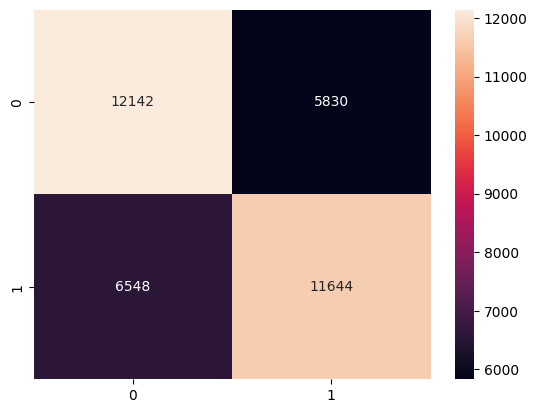

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True, fmt='d')

In [ ]:
target_names = ['Not Readmitted', 'Readmitted']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

Not Readmitted       0.65      0.68      0.66     17972
    Readmitted       0.67      0.64      0.65     18192

      accuracy                           0.66     36164
     macro avg       0.66      0.66      0.66     36164
  weighted avg       0.66      0.66      0.66     36164



Decision tree model.

In [ ]:
tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)
y_pred = tree_clf.predict(x_test)

<Axes: >

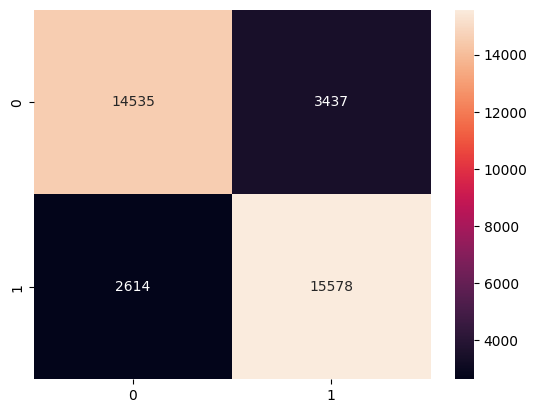

In [ ]:
tree_cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(tree_cnf_matrix, annot=True, fmt='d')

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

Not Readmitted       0.85      0.81      0.83     17972
    Readmitted       0.82      0.86      0.84     18192

      accuracy                           0.83     36164
     macro avg       0.83      0.83      0.83     36164
  weighted avg       0.83      0.83      0.83     36164



Random forest model.

In [ ]:
RF_clf = RandomForestClassifier()
RF_clf.fit(x_train, y_train)
y_pred = RF_clf.predict(x_test)

<Axes: >

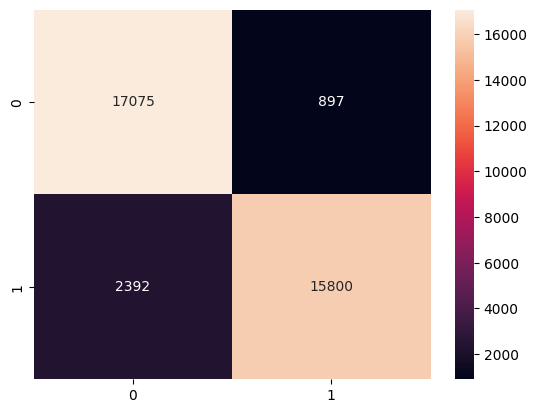

In [ ]:
RF_cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(RF_cnf_matrix, annot=True, fmt='d')

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

Not Readmitted       0.88      0.95      0.91     17972
    Readmitted       0.95      0.87      0.91     18192

      accuracy                           0.91     36164
     macro avg       0.91      0.91      0.91     36164
  weighted avg       0.91      0.91      0.91     36164



Feature importance.

<Axes: title={'center': 'Feature Importance'}, ylabel='Feature'>

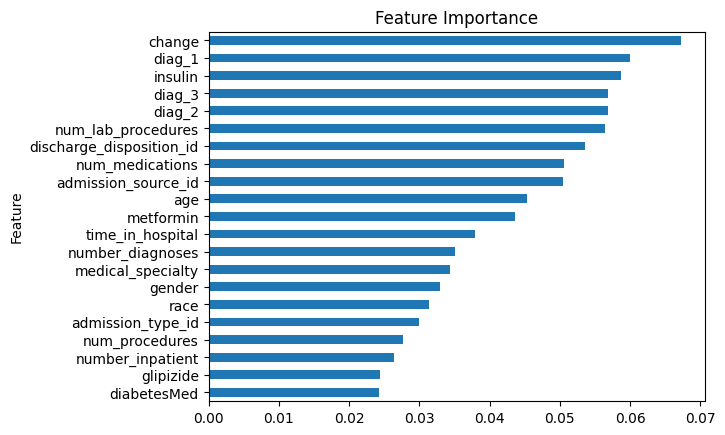

In [ ]:
importances = RF_clf.feature_importances_
forest_importances = pd.Series(importances, index=X.columns).sort_values()
plt.title('Feature Importance')
plt.ylabel('Feature')
plt.xlabel('Importance')
forest_importances['diabetesMed':'change'].plot.barh()

In [ ]:
# Feature selection
selected_features = [
    'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses', 'race', 'age', 'gender',
    'change', 'diabetesMed', 'insulin', 'medical_specialty'
]

X = encoded_cleaned_raw_df[selected_features]
y = encoded_cleaned_raw_df['readmit_30']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Build logistic regression model
logreg_model = LogisticRegression(max_iter=1000, solver='liblinear')  # Using default, without class_weight balanced

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred = logreg_model.predict(X_test)
y_pred_proba = logreg_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# ROC-AUC Evaluation
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\nROC-AUC Score:", roc_auc)


Very poor precision, recall, and f1-score for Class 1 (Readmitted).Because  dataset is highly imbalanced there are many more "Not Readmitted" (0) patients than "Readmitted" (1) patients so, the model just learns to predict almost everything as 0 (not readmitted) because that alone gives it a "good-looking" overall accuracy.  Model that always predicts "Not Readmitted" would be 90% accurate — but useless for catching readmissions.

In [ ]:
# Random forest
# Import necessary libraries

from sklearn.ensemble import RandomForestClassifier

X = encoded_cleaned_raw_df[selected_features]
y = encoded_cleaned_raw_df['readmit_30']

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Build Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    random_state=42

)

# Train the model
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate
print("\nConfusion Matrix (Random Forest) :")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)
print("\nROC-AUC Score (Random Forest) :", roc_auc_rf)




In [ ]:
from sklearn.metrics import precision_recall_curve


# Logistic Regression predictions
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_proba)

# Random Forest predictions
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_rf_proba)

# Plot both curves
plt.figure(figsize=(8,6))
plt.plot(recall_lr, precision_lr, marker='.', label='Logistic Regression')
plt.plot(recall_rf, precision_rf, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.grid()
plt.legend()
plt.show()

Precision-recall curve comparison visualizes and contrasts the performance of the models. Both show a similar shape. -as precison is higher when recall is low. Random forest slighlty better but performance of the two is  nearly the same (both follow almost identical paths.) The classification report and confusion further shows that neither model performs well on the minority class

In [ ]:
# 1. Retrain Logistic Regression with class_weight='balanced'
logreg_model_balanced = LogisticRegression(
    max_iter=1000,
    solver='liblinear',
    class_weight='balanced'
)
logreg_model_balanced.fit(X_train, y_train)

# 2. Predict
y_pred_logreg_balanced = logreg_model_balanced.predict(X_test)
y_pred_logreg_proba_balanced = logreg_model_balanced.predict_proba(X_test)[:, 1]  # for ROC curve

# See predictions
print(y_pred_logreg_balanced)

# Evaluate Performance
# Confusion matrix
print("Confusion Matrix (Logistic Regression with class_weight='balanced'):")
print(confusion_matrix(y_test, y_pred_logreg_balanced))

# Classification report
print("\nClassification Report (Logistic Regression with class_weight='balanced'):")
print(classification_report(y_test, y_pred_logreg_balanced))

# ROC-AUC Score
print("\nROC-AUC Score (Logistic Regression with class_weight='balanced'):", roc_auc_score(y_test, y_pred_logreg_proba_balanced))


Model without class_weight looked good (high accuracy) but was useless for predicting readmissions. Model with class_weight='balanced' is much more useful: it finds 51% of real readmissions! In healthcare, catching readmissions is more important than getting high overall accuracy.  with this trade-off — now it predicts more positives, but not all are correct.

In [ ]:
# Retrain Random Forest with class_weight='balanced'

rf_model_balanced = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
rf_model_balanced.fit(X_train, y_train)

# Predict
y_pred_rf_balanced = rf_model_balanced.predict(X_test)
y_pred_rf_proba_balanced = rf_model_balanced.predict_proba(X_test)[:, 1]  # for ROC curve


# Evaluate Performance
# Confusion matrix
print("Confusion Matrix (Random Forest with class_weight='balanced'):")
print(confusion_matrix(y_test, y_pred_rf_balanced))

# Classification report
print("\nClassification Report (Random Forest with class_weight='balanced'):")
print(classification_report(y_test, y_pred_rf_balanced))

# ROC-AUC Score
print("\nROC-AUC Score (Random Forest with class_weight='balanced'):", roc_auc_score(y_test, y_pred_rf_proba_balanced))




In [ ]:
# Apply SMOTE
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import SMOTE



X = encoded_cleaned_raw_df[selected_features]
y = encoded_cleaned_raw_df['readmit_30']

# Train-test split (with stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE only on training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Original training set shape:", X_train.shape, y_train.shape)
print("After SMOTE training set shape:", X_train_smote.shape, y_train_smote.shape)

# Train Logistic Regression on SMOTE data
logreg_model = LogisticRegression(max_iter=1000, solver='liblinear')
logreg_model.fit(X_train_smote, y_train_smote)

# Predict
y_pred_logreg = logreg_model.predict(X_test)
y_pred_logreg_proba = logreg_model.predict_proba(X_test)[:, 1]

# Evaluate
print("\nConfusion Matrix (Logistic Regression with SMOTE):")
print(confusion_matrix(y_test, y_pred_logreg))

print("\nClassification Report (Logistic Regression with SMOTE):")
print(classification_report(y_test, y_pred_logreg))

print("\nAccuracy Score (Logistic Regression with SMOTE):", accuracy_score(y_test, y_pred_logreg))

roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg_proba)
print("\nROC-AUC Score (Logistic Regression with SMOTE):", roc_auc_logreg)



# Train Random Forest on SMOTE data

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train_smote, y_train_smote)

# Predict
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate
print("\nConfusion Matrix (Random Forest with SMOTE):")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report (Random Forest with SMOTE):")
print(classification_report(y_test, y_pred_rf))

print("\nAccuracy Score (Random Forest with SMOTE):", accuracy_score(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)
print("\nROC-AUC Score (Random Forest with SMOTE):", roc_auc_rf)


Since logistic regression with class weight balance was the best in terms of recall (capturing of readmissions) we use this model.

In [ ]:
# Evaluate Models on the Original Test Set (unbalanced) - apply to the logistic regression with class weight balance

# 1. Predict probabilities
y_pred_logreg_proba = logreg_model_balanced.predict_proba(X_test)[:, 1]  # Use your best model!

# 2. Default threshold (0.5)
threshold_default = 0.5
y_pred_default = (y_pred_logreg_proba >= threshold_default).astype(int)

print("\n--- Evaluation at Threshold 0.5 ---")
print("Confusion Matrix (Threshold 0.5):")
print(confusion_matrix(y_test, y_pred_default))

print("\nClassification Report (Threshold 0.5):")
print(classification_report(y_test, y_pred_default))

print("ROC-AUC Score (Threshold 0.5):", roc_auc_score(y_test, y_pred_logreg_proba))



In [ ]:
# Feature importance from the balanced logistic regression model
importance = logreg_model_balanced.coef_[0]

# Create a DataFrame to map features and coefficients
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importance
}).sort_values(by='importance', ascending=False)

# Display
print(feature_importance)


In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance from Logistic Regression')
plt.show()


Visualizing how your balanced logistic regression model performs across different cutoff points - help to choose the best classification threshold for risk groups

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

# Get predicted probabilities
log_proba = logreg_model_balanced.predict_proba(X_test)[:, 1]

# Define thresholds
thresholds = np.arange(0.05, 0.95, 0.05)
precision_scores = []
recall_scores = []
f1_scores = []

# Calculate scores at each threshold
for threshold in thresholds:
    preds = (log_proba >= threshold).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, preds, average='binary', zero_division=0
    )
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label='Precision', marker='o')
plt.plot(thresholds, recall_scores, label='Recall', marker='o')
plt.plot(thresholds, f1_scores, label='F1 Score', marker='o')

plt.title('Precision, Recall, and F1-Score vs Classification Threshold (Balanced Logistic Regression)')
plt.xlabel('Classification Threshold')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


0.6 threshold gives equal weight to catching readmissions (recall) and being right about your predictions (precision). Often a good candidate for risk scoring or alerts in healthcare. 1. Low threshold (0.1-0-3) -Higher recall, lower precision (model catches more but makes more mistakes) 2. Middle threshold (0.3-0.6) - Often where F1 score peaks — good trade-off  3. High threshold (~0.7–0.9) - Higher precision, lower recall (model is very selective, may miss real cases)

Based on above thresholds we can define risk groups

In [ ]:
# 1. Define risk group assignment function
def assign_risk(prob):
    if prob >= 0.6:
        return 'High'
    elif prob >= 0.3:
        return 'Medium'
    else:
        return 'Low'

# 2. Copy X_test and add probabilities
X_test_with_probs = X_test.copy()
X_test_with_probs['readmission_risk'] = logreg_model_balanced.predict_proba(X_test)[:, 1]

# 3. Assign risk levels based on probabilities
X_test_with_probs['risk_level'] = X_test_with_probs['readmission_risk'].apply(assign_risk)

print(X_test_with_probs['risk_level'].value_counts())


In [ ]:
# DistributionPredict probabilities for readmission within 30 days
readmission_probs = logreg_model_balanced.predict_proba(X_test)[:, 1]



# Create a DataFrame with risk probabilities and risk labels
X_test_with_probs = X_test.copy()
X_test_with_probs['readmission_risk'] = readmission_probs
X_test_with_probs['risk_level'] = X_test_with_probs['readmission_risk'].apply(assign_risk)

# Plot the distribution of patients by Risk Level

plt.figure(figsize=(8, 5))
sns.countplot(
    data=X_test_with_probs,
    x='risk_level',
    order=['Low', 'Medium', 'High'],
    palette='coolwarm'
)
plt.title('Distribution of Predicted Risk Levels (Using Balanced Logistic Regression)')
plt.xlabel('Risk Level')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()



interpreting and visualizing the influence of individual features on the likelihood of hospital readmission — based on the final balanced logistic regression model. odds ratios (OR) - how far each odds ratio is from 1 (neutral) to determine which features have the strongest influence.

In [ ]:
# Get coefficients from the balanced logistic regression model
coefficients = logreg_model_balanced.coef_[0]
feature_names = X_train.columns

# Create DataFrame with just Odds Ratio
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Odds Ratio': np.exp(coefficients)  # Only odds ratio
})

# Sort by how big the odds ratios deviate from 1 (importance)
coef_df['Deviation from 1'] = np.abs(coef_df['Odds Ratio'] - 1)
coef_df = coef_df.sort_values(by='Deviation from 1', ascending=False)

# Display top features
print("🔍 Top Influential Features (by Odds Ratio):")
print(coef_df[['Feature', 'Odds Ratio']].head(10))

# Plot Odds Ratios
top_features = coef_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Odds Ratio'])
plt.axvline(x=1, color='red', linestyle='--')  # Reference line at OR = 1
plt.title('Top 10 Features by Odds Ratio (Logistic Regression Balanced)')
plt.xlabel('Odds Ratio')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()



Odds Ratio	Meaning
> 1	Feature increases odds of readmission
< 1	Feature decreases odds of readmission
= 1	No effect on odds

Step-by-Step Plan for a Basic Simulator


Parameter	Default Value
Readmission window	Next 30 days
Staff-to-patient ratio	1 nurse per 5 patients
Beds per ward	30
Return timing	Random day between 1–30 if readmitted

We use the high-risk group because those are the patients most likely to actually be readmitted within 30 days — which is what the hospital needs to prepare for.

In [ ]:
# Filter high-risk patients
high_risk_df = X_test_with_probs[X_test_with_probs['readmission_risk'] >= 0.6].copy()

# Simulate readmission day (random 1–30)
np.random.seed(42)
high_risk_df['days_until_return'] = np.random.randint(1, 31, size=len(high_risk_df))

# Group by day
staffing_forecast = (
    high_risk_df.groupby('days_until_return')
    .size()
    .reset_index(name='expected_readmissions')
    .sort_values('days_until_return')
)

# Calculate required nurses (1 nurse per 5 patients)
staffing_forecast['required_nurses'] = (staffing_forecast['expected_readmissions'] / 5).apply(np.ceil)

# Step 5: Plot
plt.figure(figsize=(12, 6))
plt.bar(staffing_forecast['days_until_return'], staffing_forecast['required_nurses'], color='teal')
plt.title('🧑‍⚕️ Projected Nurse Staffing Needs Based on High-Risk Readmissions')
plt.xlabel('Days from Today (Next 30 Days)')
plt.ylabel('Required Nurses (1 per 5 patients)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
# Create a copy of the data
follow_up_df = X_test_with_probs.copy()

# Define follow-up strategy based on risk level
def follow_up_plan(row):
    if row['risk_level'] == 'High':
        return 'Call within 3 days'
    elif row['risk_level'] == 'Medium':
        return 'Send SMS within 7 days'
    else:
        return 'Routine care / No immediate action'

# Apply follow-up plan
follow_up_df['follow_up_action'] = follow_up_df.apply(follow_up_plan, axis=1)

# Preview
follow_up_df[['readmission_risk', 'risk_level', 'follow_up_action']].head()


In [ ]:
# Plot Follow-Up Action Counts

# Plot count of follow-up actions using existing DataFrame
plt.figure(figsize=(8, 5))
follow_up_df['follow_up_action'].value_counts().plot(kind='bar', color='skyblue')

# Formatting
plt.title('Recommended Follow-Up Actions by Risk Level')
plt.xlabel('Follow-Up Action')
plt.ylabel('Number of Patients')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [ ]:
# Grouped Bar Chart (by risk_level and follow_up_action)
# Create a grouped count table
grouped_counts = follow_up_df.groupby(['risk_level', 'follow_up_action']).size().unstack(fill_value=0)

# Plot grouped bar chart
grouped_counts.plot(kind='bar', figsize=(10, 6), colormap='Set2')

# Formatting
plt.title('Follow-Up Actions by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.legend(title='Follow-Up Action')
plt.tight_layout()
plt.show()
